# Pymaceuticals Inc.

# Analysis

In testing the drug regimen, Capomulin, against all the other drugs; here is what I found. The one other drug regimen with results very similar to Capomulin was Ramicane. The average tumor volume mm3 for Capomulin was 40.67 and the average tumor volume mm3 for Ramicane was 40.12. With that being said, these two drug regimens had the highest number of mice tested on them. About 100 more mice were in these drug treatments than the next highest drug regimen. The drug regimen that seemed to be the least effective was Ketapril with an average tumor volume mm3 of 55.23. In terms of comparing each drug regimen to Capomulin and Ramicane, none of the others came close to being as effective. The closest one to Capomulin and Ramicane was Propiva with an average tumor volume mm3 of 52.32, about 12 mm3 higher than Capomulin and Ramicane. While looking at the data as a whole and seeing if there was any correlation between the weight of the mouse and the average tumor volume, I found that there is a strong correlation between the two. The correlation is 0.84, any number above 0.7 indicates a strong correlation. In other words, the heavier the mouse, the more tumor volume they are going to have. All in all, I think it was a fair testing environment and not biased or swayed towards one drug regimen than others. Ramicane would be a great alternate choice to Capomulin. 

In [1]:
# Import functions 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import scipy.stats as linregress

# make a path to the csv files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read in the csv files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")

# Display the data table for preview
#Reorder the columns
combined_data_df = combined_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", 
                                  "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of unique mice

combined_data_df["Mouse ID"].unique().size

249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#use loc, duplicated, and unique
#once you set up the loc and duplicated functions, specify which column you want to show
#Use the unique function to get that 1 value

mice_time = combined_data_df.loc[combined_data_df.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mice_time                            

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#have to specify g989 instead of using the array 'mice_time'

mice_time_df = combined_data_df.loc[combined_data_df["Mouse ID"]== "g989"]
mice_time_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combined_data_df[(combined_data_df['Mouse ID'] != 'g989')]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].unique().size

248

# Summary Statistics

In [7]:
#create variable for grouping of drug regimen
#reg_tum = clean_data[["Drug Regimen", "Tumor Volume (mm3)"]]

regimen = clean_data.groupby("Drug Regimen")
#regimen


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = regimen["Tumor Volume (mm3)"].mean()
median = regimen["Tumor Volume (mm3)"].median()
variance = regimen["Tumor Volume (mm3)"].var()
std_dev = regimen["Tumor Volume (mm3)"].std()
sem = regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

statistics_data = pd.DataFrame({"Mean Tumor Volume": mean, 
                                "Median Tumor Volume": median,
                               "Tumor Volume Variance": variance, 
                                "Tumor Volume Std. Dev.": std_dev,
                               "Tumor Volume Std. Err.": sem})

statistics_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

advanced_data = regimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
advanced_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

In [10]:
#set the value for the index of the bar chart
#set to value_counts to get each unique value for timepoints/mouse id

drug_count = clean_data["Drug Regimen"].value_counts()
#drug_count

<Axes: title={'center': 'Amount of Mice Tested per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Observed Mouse Timepoints'>

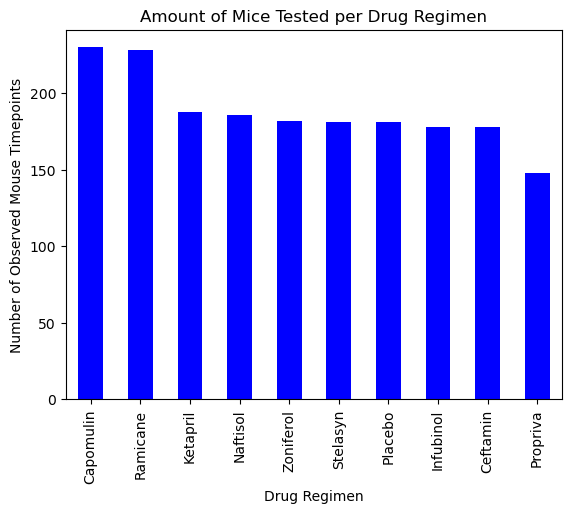

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar_chart_pan = drug_count.plot(kind="bar", color="b", title="Amount of Mice Tested per Drug Regimen",
                               xlabel="Drug Regimen", ylabel="Number of Observed Mouse Timepoints")


bar_chart_pan

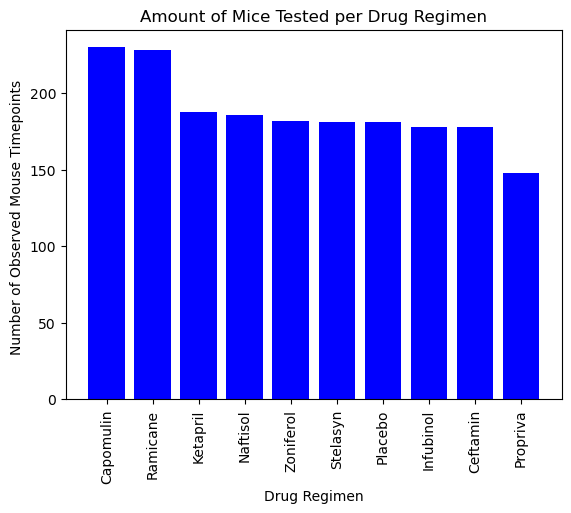

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#set where to get length from
#use index to get names instead of numbers
data = drug_count.index

#collect data for x axis by using the length function and take the value counts of the drugs from above
x_axis = np.arange(len(data))
plt.bar(x_axis, drug_count, color="b")

#set x ticks location
tick_location = [value for value in x_axis]
plt.xticks(tick_location, data, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints ")
plt.title("Amount of Mice Tested per Drug Regimen")

plt.show()

<Axes: title={'center': 'Male vs Female Mice'}, ylabel='Sex'>

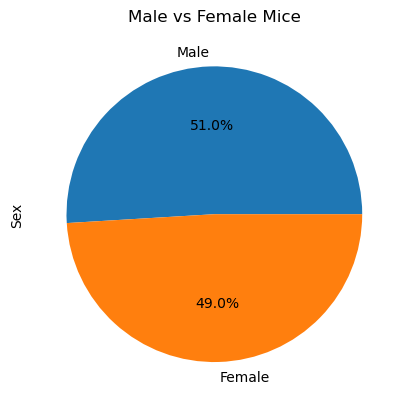

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#female_data = clean_data.loc[(clean_data["Sex"]=="Female")]
#female_data.count()
#male_data = clean_data.loc[(clean_data["Sex"]=="Male")]
#male_data.count()

#create list of sexes of mice. Use value counts to get each count for male and female
mice_sex = clean_data["Sex"].value_counts()

pie_chart_pan = mice_sex.plot(kind="pie", autopct = "%1.1f%%", title="Male vs Female Mice")
pie_chart_pan

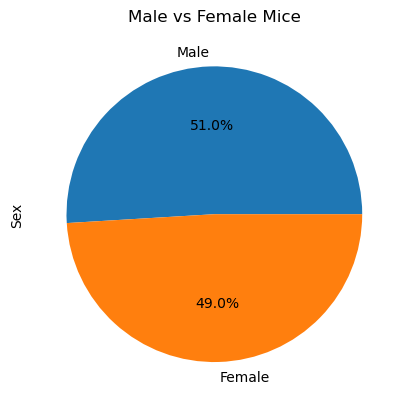

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
plt.pie(mice_sex, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Male vs Female Mice")
plt.show()

# Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#capomulin = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
#ramicane = clean_data.loc[clean_data["Drug Regimen"]=="Ramicane"]
#infubinol = clean_data.loc[clean_data["Drug Regimen"]=="Infubinol"]
#ceftamin = clean_data.loc[clean_data["Drug Regimen"]=="Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse

greatest_time = clean_data.groupby("Mouse ID").max()["Timepoint"]
greatest_time = pd.DataFrame(greatest_time)
greatest_time.reset_index(drop=True)
#greatest_time

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merge_data = pd.merge(clean_data, greatest_time, on=["Timepoint","Mouse ID"], how="right")
merge_data.reset_index(drop=True)
merge_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

#drug_list = [(capomulin), (ramicane), (infubinol), (ceftamin)]
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for x in drug_list:
    mice_tumor = merge_data.loc[merge_data["Drug Regimen"]==x]["Tumor Volume (mm3)"]
    tumor_vol_data.append(mice_tumor)
    #tumor_vol_data


    # add subset 
    subset = pd.DataFrame(mice_tumor, columns=["Tumor Volume (mm3)"])
    #subset
    
    # Determine outliers using upper and lower bounds
    quartiles = subset["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75]) 
    lower = quartiles[0.25]
    median = quartiles[0.5]
    upper = quartiles[0.75]
    iqr = upper - lower
    
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)
    
    print(f"{x}'s potential outliers are {round(lower_bound,2)} : {round(upper_bound,2)}")
    

Capomulin's potential outliers are 20.7 : 51.83
Ramicane's potential outliers are 17.91 : 54.31
Infubinol's potential outliers are 36.83 : 82.74
Ceftamin's potential outliers are 25.36 : 87.67


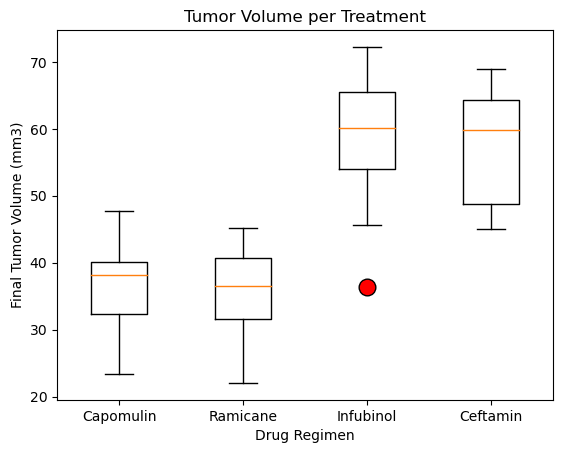

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume per Treatment")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_data, labels=drug_list, flierprops=dict(markerfacecolor="red", markersize=12))
plt.show()

# Line and Scatter Plots

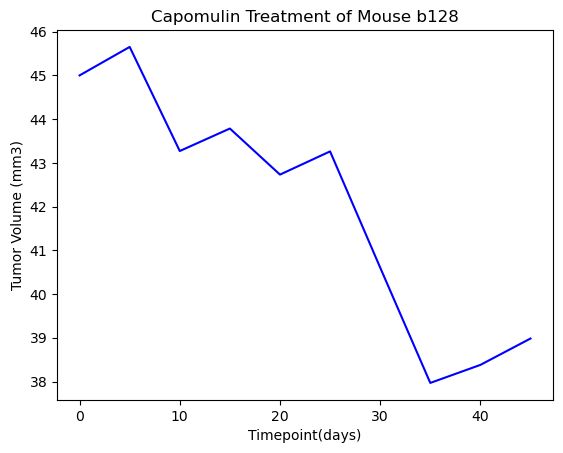

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
#pick random mouse
mouse_data = capomulin.loc[capomulin["Mouse ID"]=="b128"]
#set axis
x_axis = mouse_data["Timepoint"]
y_axis = mouse_data["Tumor Volume (mm3)"]

#plot the line plot with titles and labels
plt.plot(x_axis, y_axis, color="blue")
plt.title("Capomulin Treatment of Mouse b128")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

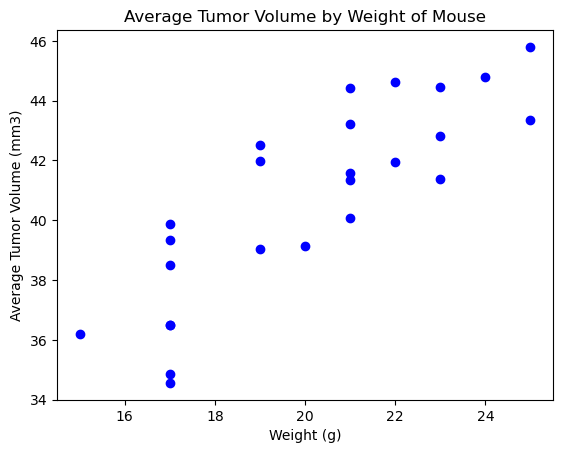

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# data = capomulin.iloc[:,[0,2,7]]
# data

#create variable for the Mouse Id in the capomulin dataframe
data= capomulin.groupby("Mouse ID")
# data

#create x and y variables with x being the average weight and y being the average tumor volume
#have to use an aggregation for weigth since we are using a groupby with it
x = data["Weight (g)"].mean()
y = data["Tumor Volume (mm3)"].mean()

#plot the scatter plot with the titles and labels
plt.scatter(x, y, color="b")
plt.title("Average Tumor Volume by Weight of Mouse")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


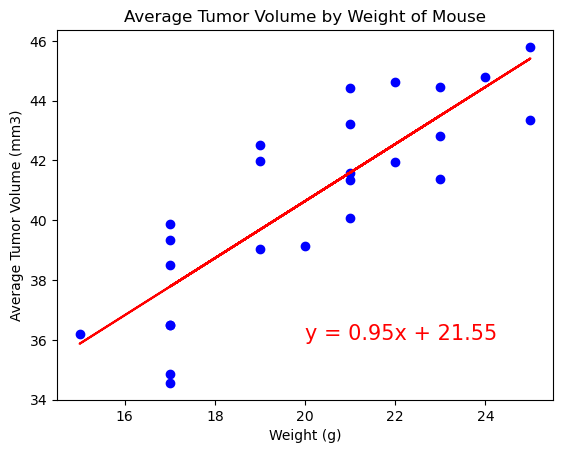

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#find correlation using pearsons r function for the x and y values calculated above
correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#find linear regression
(slope, intercept, r, p, sterr) = st.linregress(x, y)

#find the y intercept using the equation of a line (y=mx+b)
line = slope * x + intercept

#print the line equation with annotate below
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the line regress ontop of previous scatter plot
plt.scatter(x, y, color="b")
plt.plot(x, line, "r-")
plt.annotate(line_eq, (20, 36), color="red", fontsize = 15)
plt.title("Average Tumor Volume by Weight of Mouse")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()